# Introduction

About this Dataset https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data

Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

# Method

1.Descriptive statistics Descriptive statistics is a branch of statistics that involves summarizing and describing the main features of a dataset. It provides a snapshot of the data, highlighting its central tendencies, variability, and distribution.

2.Z-Score Z-score, also known as a standard score, is a statistical measure that indicates how many standard deviations a data point is from the mean of a distribution. It's a way to standardize data, making it easier to compare values from different distributions.

3.Independent Sample T test An independent samples t-test is a statistical test used to compare the means of two independent groups. It helps determine whether there is a significant difference between the average values of the two groups.  

4.Time series A time series is a sequence of data points indexed in time order. Each data point corresponds to a specific time instant. This type of data is ubiquitous, found in various fields like finance, economics, meteorology, and engineering.

5.ARIMA model Stands for AutoRegressive Integrated Moving Average. It's a powerful statistical method used for analyzing and forecasting time series data. Time series data is a sequence of observations recorded over time, like daily stock prices, monthly sales figures, or hourly temperature readings.

#  Data display

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
# Load datasets
data = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [3]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


# Descriptive statistics

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


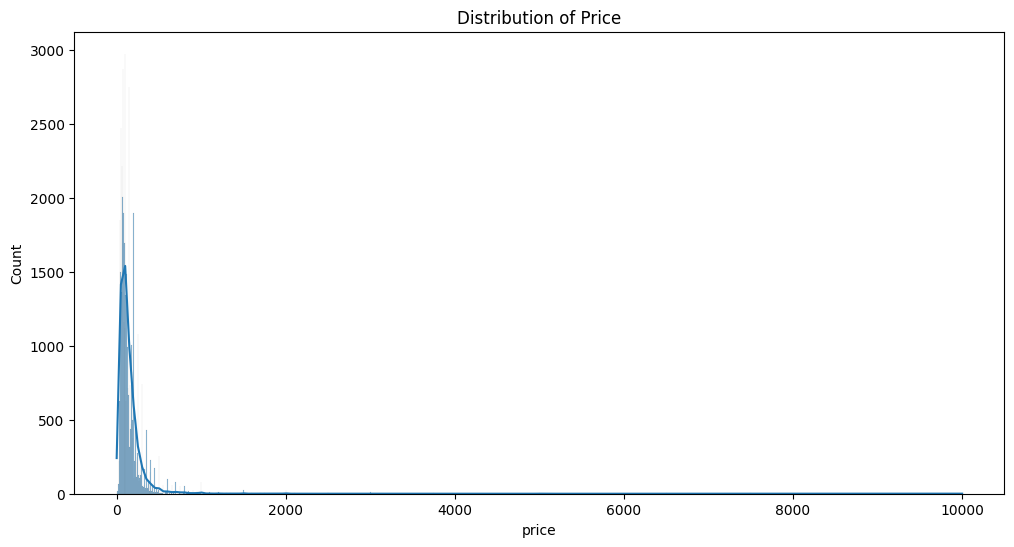

In [5]:
# Choose column to display
x = data['price']

# Histogram of traffic volume
plt.figure(figsize=(12,6))
sns.histplot(x, kde=True)
plt.title('Distribution of Price')
plt.show()

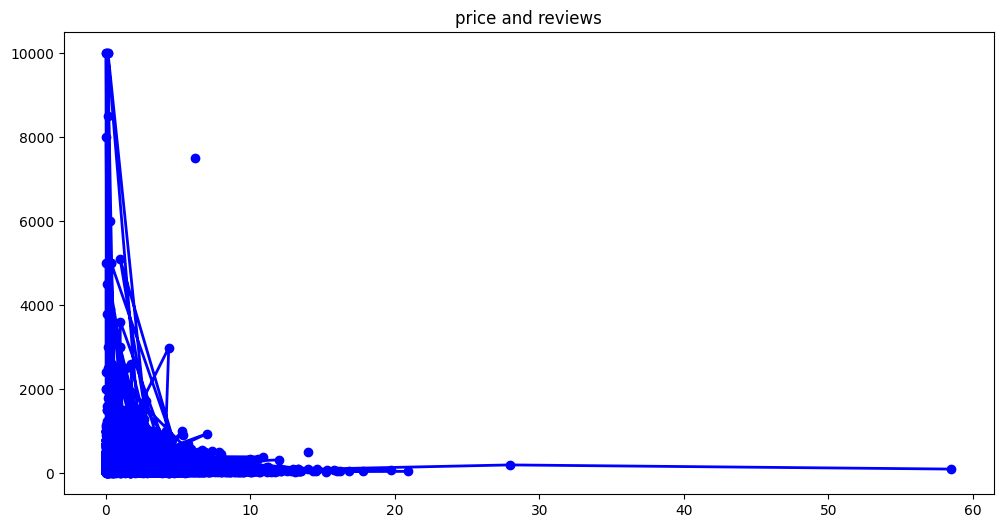

In [6]:
# Choose column to display
x = data['reviews_per_month']
y = data['price']

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='blue', linewidth=2, marker='o')
plt.title('price and reviews')

plt.show()

# Z-Score

In [7]:
from scipy import stats

# Find outliers using z-scores
z_scores = np.abs(stats.zscore(data['reviews_per_month']))
threshold = 3
print(data['reviews_per_month'][(z_scores > threshold)])

Series([], Name: reviews_per_month, dtype: float64)


In [8]:
from scipy import stats

# Find outliers using z-scores
z_scores = np.abs(stats.zscore(data['price']))
threshold = 3
print(data['price'][(z_scores > threshold)])

496      2000
762      1300
946      3000
1105     1300
1414     1000
         ... 
48301     999
48304    2999
48305    1999
48523    1369
48535    1749
Name: price, Length: 388, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


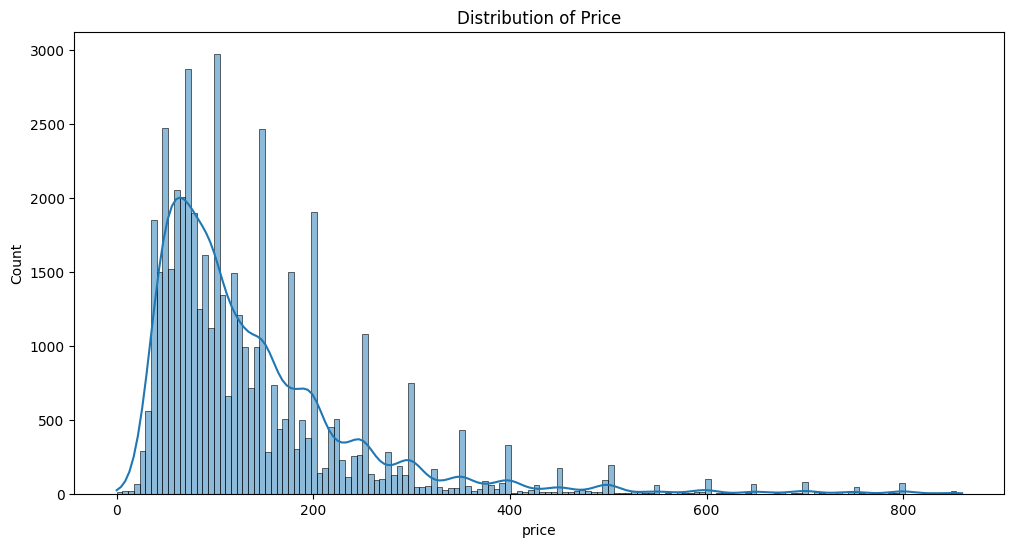

In [9]:
# Filter the DataFrame based on Z-score
filtered_data = data[z_scores < threshold]

# Choose column to display
x = filtered_data['price']

# Histogram of traffic volume
plt.figure(figsize=(12,6))
sns.histplot(x, kde=True)
plt.title('Distribution of Price')
plt.show()

# Independent Sample T test

In [10]:
import pandas as pd
from scipy import stats

# Filter the DataFrame based on the junction values
mh = data[data['neighbourhood_group'] == 'Manhattan']
br = data[data['neighbourhood_group'] == 'Brooklyn']

# Independent sample T-test
t_stat, p_value = stats.ttest_ind(mh['price'], br['price'])
print("p_value:", p_value)

# Significant difference test
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two junctions")
else:
    print("There is no significant difference between the two junctions")

p_value: 8.973192961269122e-196
There is a significant difference between the two junctions


# Time series

In [11]:
# Time series
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(y[data['neighbourhood_group'] == 'Manhattan'], order=(1,1,1))
model_fit = model.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Figure size 1200x600 with 0 Axes>

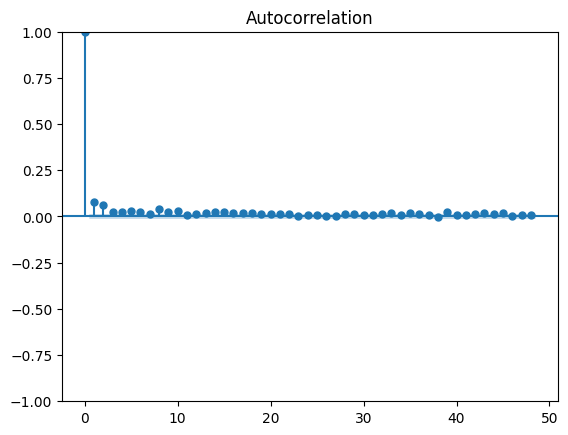

In [12]:
# Autocorrelogram
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12, 6))
plot_acf(y[data['neighbourhood_group'] == 'Manhattan'], lags=48)  # Observe autocorrelation over 48 lag periods
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                21661
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -153521.141
Date:                Mon, 04 Nov 2024   AIC                         307048.282
Time:                        14:59:58   BIC                         307072.232
Sample:                             0   HQIC                        307056.087
                              - 21661                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0682      0.002     30.480      0.000       0.064       0.073
ma.L1         -0.9942      0.001  -1939.381      0.000      -0.995      -0.993
sigma2      8.391e+04     58.075   1444.822      0.0

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


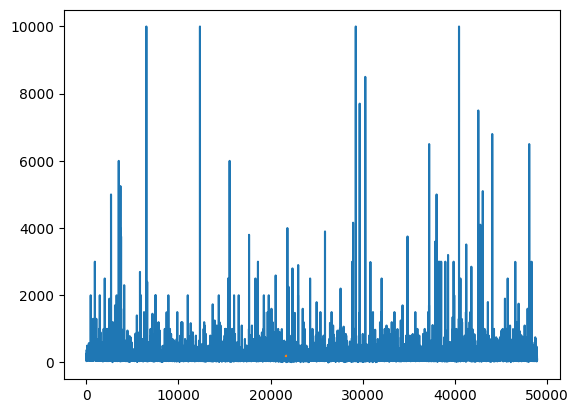

In [13]:
# Show model abstract
print(model_fit.summary())

# Make prediction
forecast = model_fit.forecast(steps=12)
print(forecast)

# Visible
plt.plot(y[data['neighbourhood_group'] == 'Manhattan'], label='observed')
plt.plot(forecast, label='forecast')
plt.show()

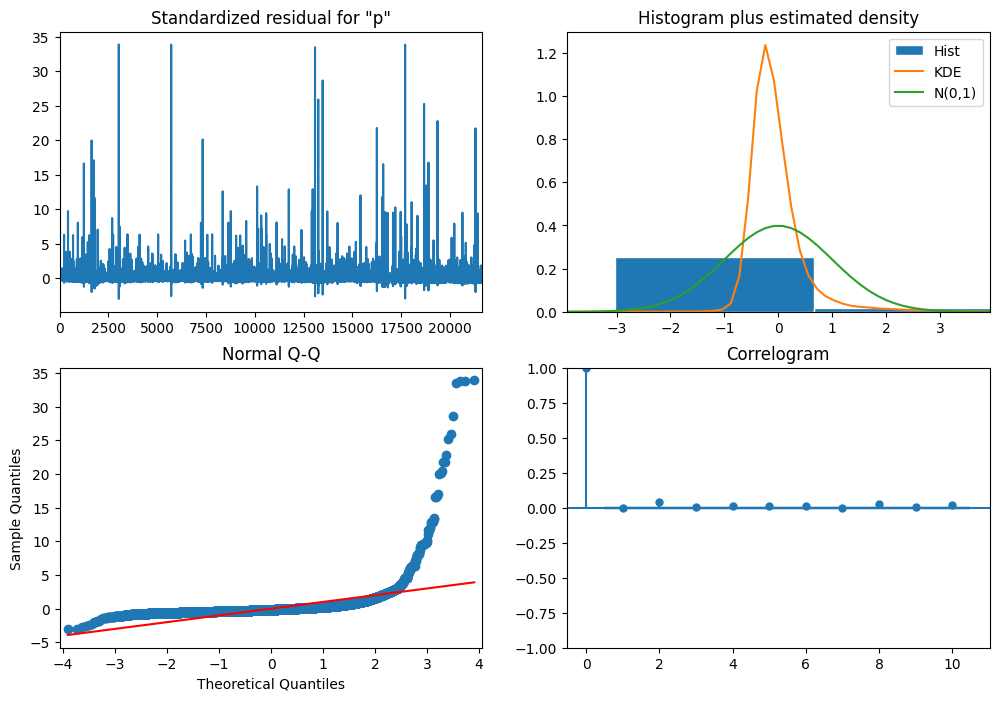

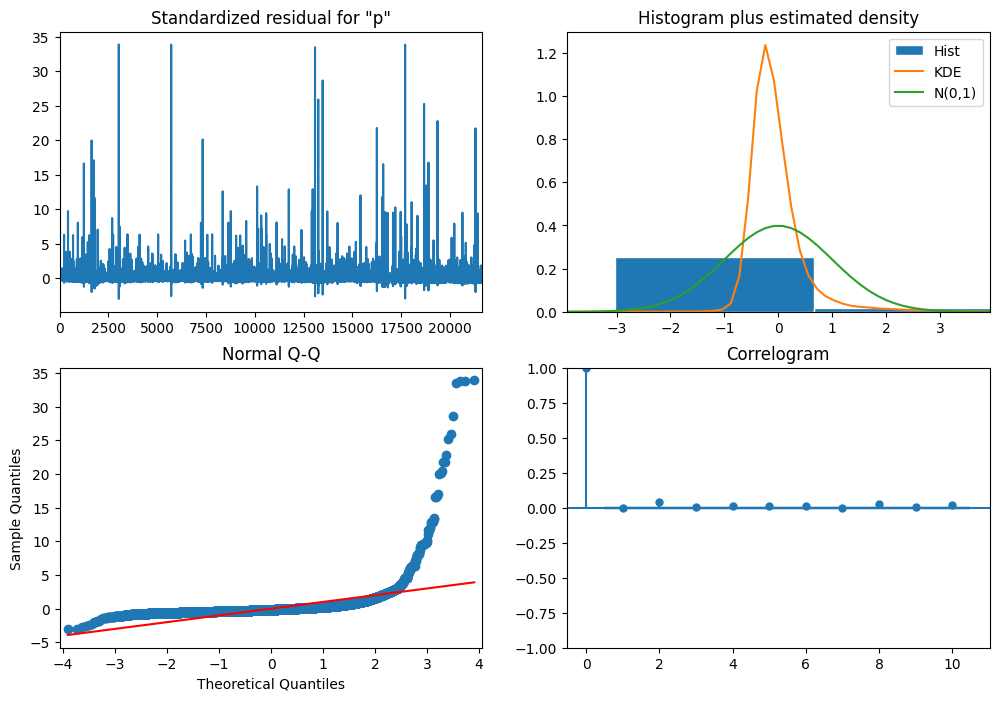

In [14]:
model_fit.plot_diagnostics(figsize=(12, 8))

# Predition

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

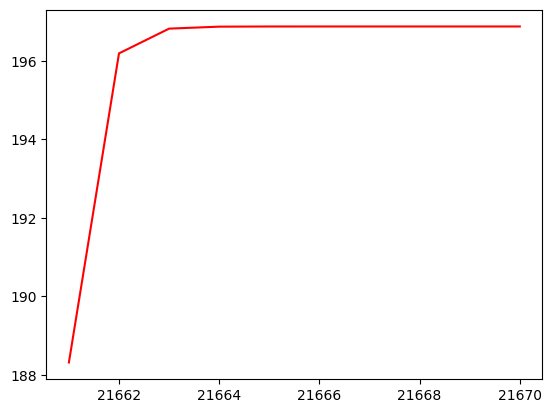

In [15]:
# Establish ARIMA model
model = ARIMA(mh['price'], order=(1,0,0))  # p, d, q 為模型參數
model_fit = model.fit()

# Make prediction
forecast = model_fit.forecast(steps=10)

# Visiualize
plt.plot(forecast, color='red')
plt.show()

# Conclusion

# Future work¶